In [1]:
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scienceplots


In [2]:
rows = list()
for cfg in range(1, 13):
    for num_t in range(3, 16):
        plan_file = f"../results/tfd/pln_{cfg}_{num_t}t.txt"
        if not os.path.exists(plan_file):
            # rows.append({'config':cfg,'num_trains':num_t,'solved':False,'num_expansions':None,'makespan':None})
            continue
        with open(plan_file, 'r') as f:
            lines = f.readlines()
        # plan_idxs = [i for i in range(len(lines)) if lines[i].lower().startswith('found new plan')]
        ms_idxs = [i for i in range(len(lines)) if lines[i].lower().startswith('makespan')]
        if len(ms_idxs) < 1:
            print(f'No makespans for cfg {cfg} and num_t {num_t}!')
            ms = None
            solved = False
        else:
            ms = int(lines[ms_idxs[-1]].split(':')[1].strip())
            solved = True

        exp_idxs = [i for i in range(len(lines)) if lines[i].lower().startswith('expanded nodes')]
        if len(exp_idxs) < 1:
            print(f'No expansions for cfg {cfg} and num_t {num_t}!')
            exp = -1
        else:
            exp = int(lines[exp_idxs[-1]].split(':')[1].split('state')[0].strip())
        if solved:
            rows.append({'config':cfg,'num_trains':num_t,'num_expansions':exp,'makespan':ms})

df = pd.DataFrame(rows)

No expansions for cfg 1 and num_t 5!
No expansions for cfg 1 and num_t 6!
No expansions for cfg 6 and num_t 7!


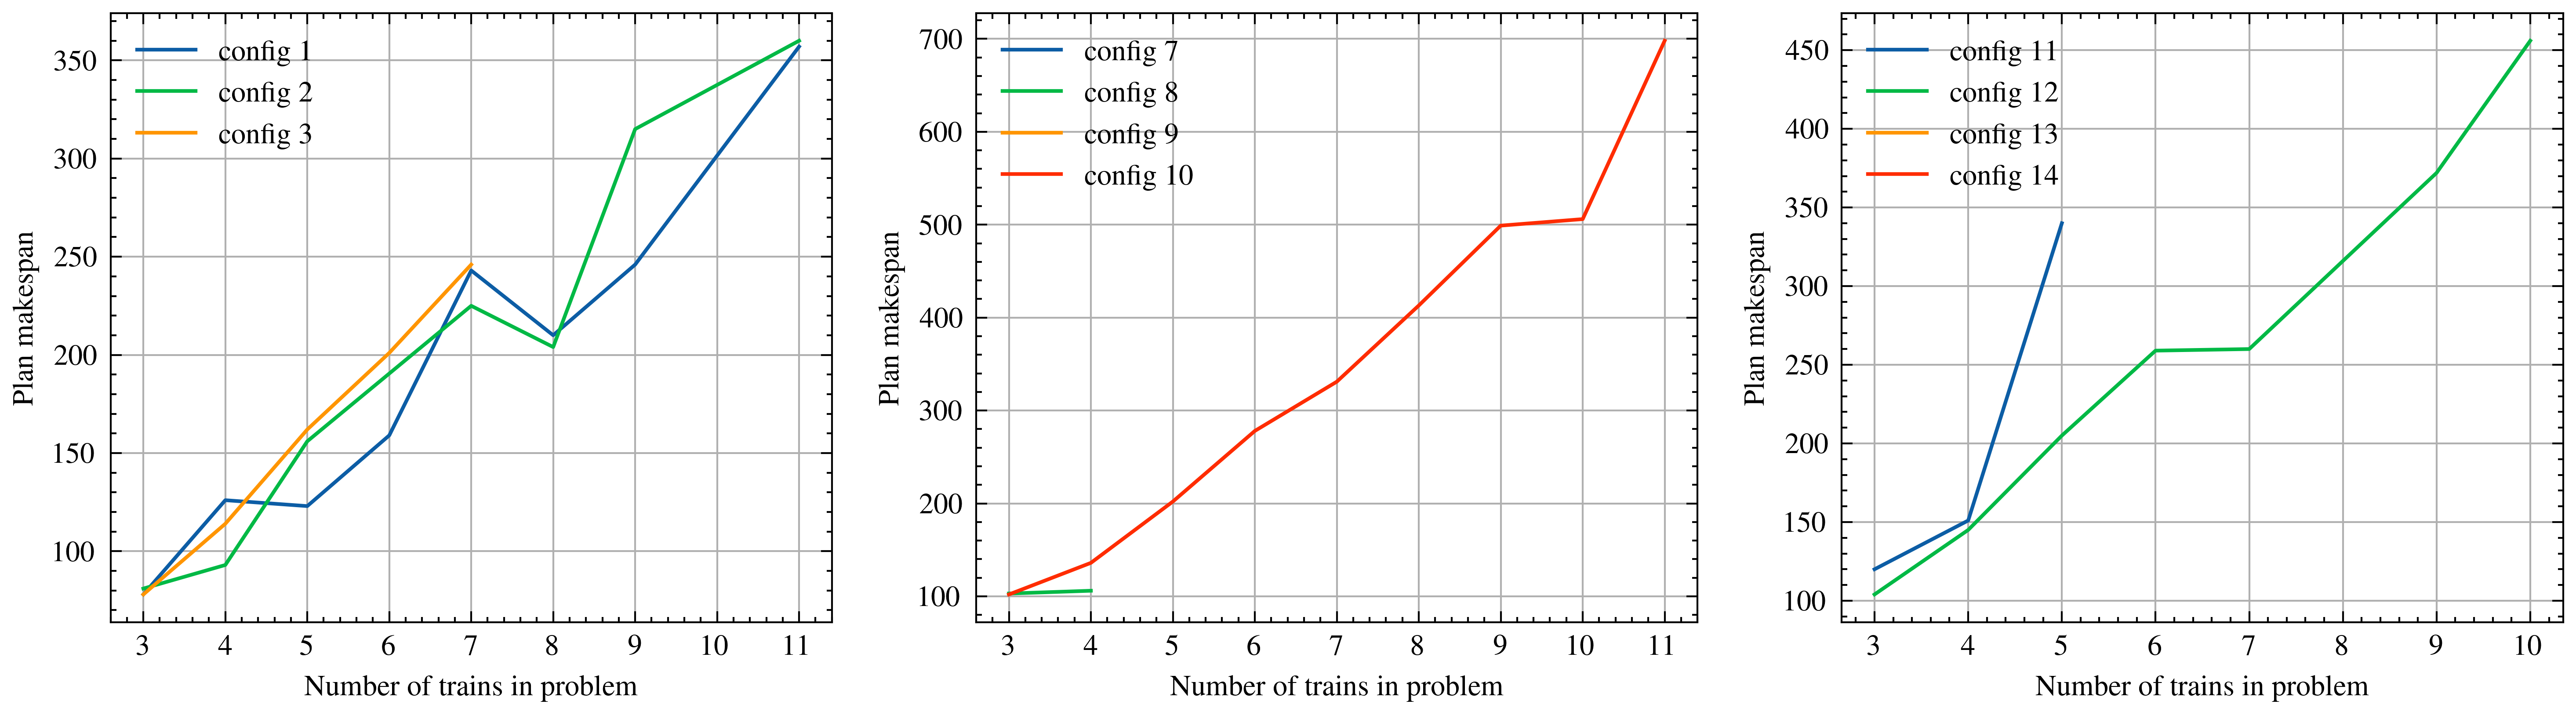

In [3]:
plt.style.use(['ieee', 'science'])

groups = [[1,2,3],[7,8,9,10],[11,12,13,14]]
group_x, group_y = [], []
for group in groups:
    x, y = [], []
    for cfg in group:
        df_filt = df.query(f"config=={cfg}")
        # df_filt = df_filt[df_filt['makespan'] > 0]
        x.append(list(df_filt['num_trains']))
        y.append(list(df_filt['makespan']))
    group_x.append(x)
    group_y.append(y)

fig, ax = plt.subplots(1, len(groups), figsize=(12,3))
for i in range(len(groups)):
    for j in range(len(group_x[i])):
        ax[i].plot(group_x[i][j], group_y[i][j], label=f'config {groups[i][j]}')
        ax[i].legend(loc='upper left')
        ax[i].grid(True)
        ax[i].set_xlabel('Number of trains in problem')
        ax[i].set_ylabel('Plan makespan')
        ax[i].xaxis.set_major_locator(MaxNLocator(integer=True))


In [4]:
group_y

[[[78, 126, 123, 159, 243, 210, 246, 357],
  [81, 93, 156, 225, 204, 315, 360],
  [78, 114, 162, 201, 246]],
 [[], [103, 106], [], [102, 136, 202, 278, 331, 413, 499, 506, 698]],
 [[120, 151, 340], [104, 145, 205, 259, 260, 372, 456], [], []]]

In [5]:
# for cfg in range(4, 9):
# cfg = 9
# for num_t in range(3, 16):
#     plan_file = f"../results/tfd/pln_{cfg}_{num_t}t.txt"
#     if not os.path.exists(plan_file):
#         # rows.append({'config':cfg,'num_trains':num_t,'solved':False,'num_expansions':None,'makespan':None})
#         continue
#     os.rename(f"../results/tfd/pln_{cfg}_{num_t}t.txt", f"../results/tfd/pln_{cfg+1}_{num_t}t.txt")